In [149]:
import pandas as pd

col_names = [
    "Sex", "Length", "Diameter", "Height",
    "Whole_weight", "Shucked_weight", "Viscera_weight",
    "Shell_weight", "Rings"
]

# read the local file (same folder as the notebook)
df = pd.read_csv("abalone.data", header=None, names=col_names)

# features and target (keep same variable names as before)
X = df.drop("Rings", axis=1)
y = df["Rings"]


In [150]:
#Age grouping
df = df.copy()

df["Age"] = df["Rings"] + 1.5  
def age_to_class(age):
    if age <= 7:
        return 1
    elif age <= 10:
        return 2
    elif age <= 15:
        return 3
    else:
        return 4
df["AgeClass"] = df["Age"].apply(age_to_class)
df.head()


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age,AgeClass
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,4
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,2
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,3
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,3
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,2


In [151]:
df["AgeClass"].value_counts().sort_index()


AgeClass
1     189
2    1218
3    2280
4     490
Name: count, dtype: int64

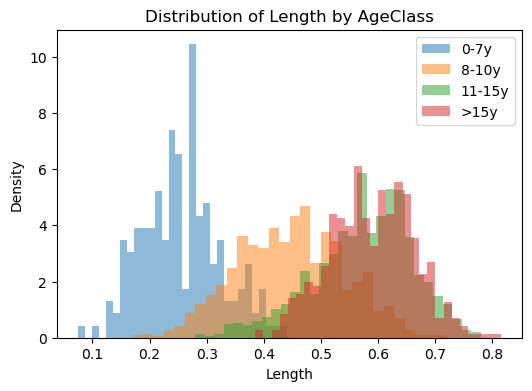

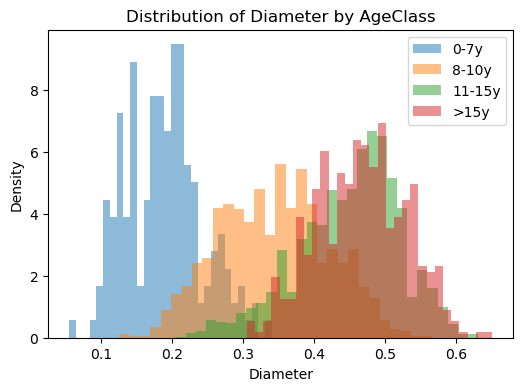

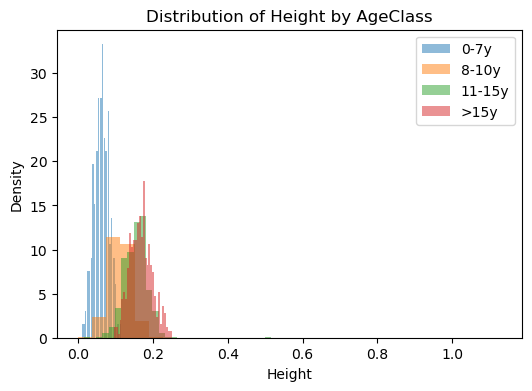

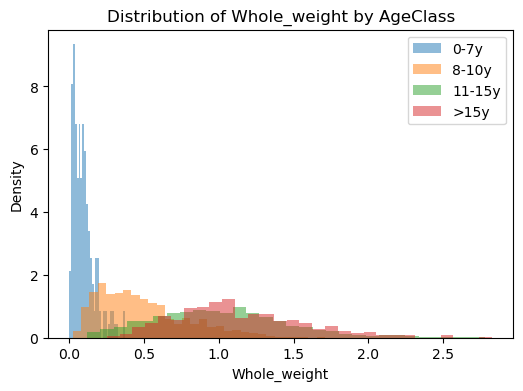

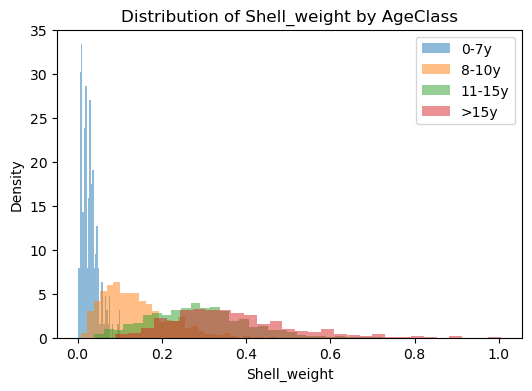

In [152]:
import matplotlib.pyplot as plt
#Distribution by ageclass
features = ["Length", "Diameter", "Height", "Whole_weight", "Shell_weight"]
class_labels = {1:"0-7y", 2:"8-10y", 3:"11-15y", 4:">15y"}
colors = ["tab:blue","tab:orange","tab:green","tab:red"]

for feat in features:
    plt.figure(figsize=(6,4))
    for cls, c in zip([1,2,3,4], colors):
        subset = df[df["AgeClass"] == cls][feat]
        plt.hist(subset, bins=30, alpha=0.5, label=class_labels[cls], density=True, color=c)
    plt.title(f"Distribution of {feat} by AgeClass")
    plt.xlabel(feat)
    plt.ylabel("Density")
    plt.legend()
    plt.show()


In [153]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

numeric_cols = [
    "Length",
    "Diameter",
    "Height",
    "Whole_weight",
    "Shucked_weight",
    "Viscera_weight",
    "Shell_weight"
]

# Standardization
X_num = df[numeric_cols].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

# PCA (2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.90787315 0.03991891]


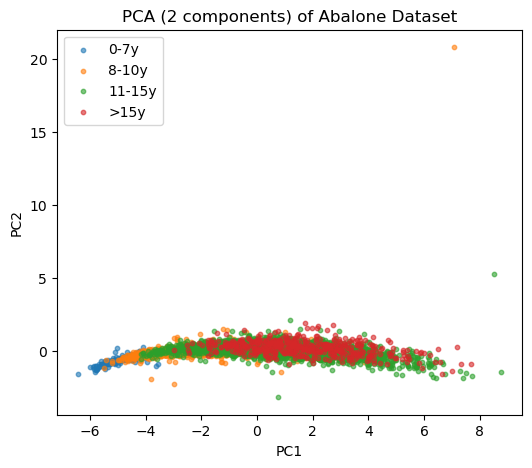

In [154]:
#graph of PCA
plt.figure(figsize=(6,5))
for cls, c in zip([1,2,3,4], colors):
    idx = (df["AgeClass"].values == cls)
    plt.scatter(X_pca[idx,0], X_pca[idx,1], s=10, alpha=0.6, color=c, label=class_labels[cls])

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2 components) of Abalone Dataset")
plt.legend()
plt.show()


In [155]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Delete the gender
X = df[numeric_cols].values
y = df["AgeClass"].values


In [156]:
import pandas as pd

results = []

max_depth_list = [3, 5, 7, 9, None] # List of tree depths to test
random_states = [0, 1, 2, 3, 4]   # 5 times experiment

for rs in random_states:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=rs, stratify=y
    )

    for depth in max_depth_list:
        clf = DecisionTreeClassifier(max_depth=depth, random_state=rs)
        clf.fit(X_train, y_train)

        train_acc = accuracy_score(y_train, clf.predict(X_train))
        test_acc = accuracy_score(y_test, clf.predict(X_test))

        results.append({
            "random_state": rs,
            "max_depth": depth,
            "train_acc": train_acc,
            "test_acc": test_acc
        })

results_df = pd.DataFrame(results)
results_df


,random_state,max_depth,train_acc,test_acc
0,0,3.0,0.685939,0.696970
1,0,5.0,0.725624,0.682616
2,0,7.0,0.773520,0.671451
3,0,9.0,0.847759,0.661882
4,0,NaN,1.000000,0.619617
5,1,3.0,0.689702,0.686603
6,1,5.0,0.717414,0.697767
7,1,7.0,0.762573,0.667464
8,1,9.0,0.819022,0.644338
9,1,NaN,1.000000,0.588517


In [157]:
best_row = results_df.loc[results_df["test_acc"].idxmax()]
best_row


random_state    4.000000
max_depth       5.000000
train_acc       0.713650
test_acc        0.715311
Name: 21, dtype: float64

In [158]:
from sklearn.tree import export_text
# Extract the best random_state and max_depth from the best row
best_rs = int(best_row["random_state"])
best_depth = None if pd.isna(best_row["max_depth"]) else int(best_row["max_depth"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=best_rs, stratify=y
)

best_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=best_rs)
best_tree.fit(X_train, y_train)

tree_rules = export_text(best_tree, feature_names=numeric_cols)
print(tree_rules)


|--- Shell_weight <= 0.15
|   |--- Viscera_weight <= 0.02
|   |   |--- Shell_weight <= 0.02
|   |   |   |--- Viscera_weight <= 0.01
|   |   |   |   |--- Viscera_weight <= 0.01
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Viscera_weight >  0.01
|   |   |   |   |   |--- class: 1
|   |   |   |--- Viscera_weight >  0.01
|   |   |   |   |--- Shucked_weight <= 0.02
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Shucked_weight >  0.02
|   |   |   |   |   |--- class: 1
|   |   |--- Shell_weight >  0.02
|   |   |   |--- Shell_weight <= 0.06
|   |   |   |   |--- Shucked_weight <= 0.04
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Shucked_weight >  0.04
|   |   |   |   |   |--- class: 1
|   |   |   |--- Shell_weight >  0.06
|   |   |   |   |--- class: 3
|   |--- Viscera_weight >  0.02
|   |   |--- Height <= 0.10
|   |   |   |--- Length <= 0.26
|   |   |   |   |--- class: 1
|   |   |   |--- Length >  0.26
|   |   |   |   |--- Shell_weight <= 0.06
|   |   |   |   |   |---

In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate pruning paths using fixed random_state
rs = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=rs, stratify=y
)

# No depth limit
clf = DecisionTreeClassifier(random_state=rs)
clf.fit(X_train, y_train)

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

len(ccp_alphas), ccp_alphas[:10]


(347,
 array([0.        , 0.00021722, 0.00021816, 0.0002236 , 0.00022421,
        0.00022529, 0.00026595, 0.00026619, 0.00027369, 0.00027369]))

In [160]:
pruned_results = []

for alpha in ccp_alphas:
    clf_pruned = DecisionTreeClassifier(random_state=rs, ccp_alpha=alpha)
    clf_pruned.fit(X_train, y_train)
# Build a decision tree with a specific pruning parameter (ccp_alpha)
    train_acc = accuracy_score(y_train, clf_pruned.predict(X_train))
    test_acc = accuracy_score(y_test, clf_pruned.predict(X_test))

    pruned_results.append({
        "alpha": alpha,
        "train_acc": train_acc,
        "test_acc": test_acc
    })

pruned_df = pd.DataFrame(pruned_results)
pruned_df.head()


,alpha,train_acc,test_acc
0,0.000000,1.000000,0.597289
1,0.000217,0.999658,0.597289
2,0.000218,0.999316,0.597289
3,0.000224,0.998974,0.597289
4,0.000224,0.998632,0.598884


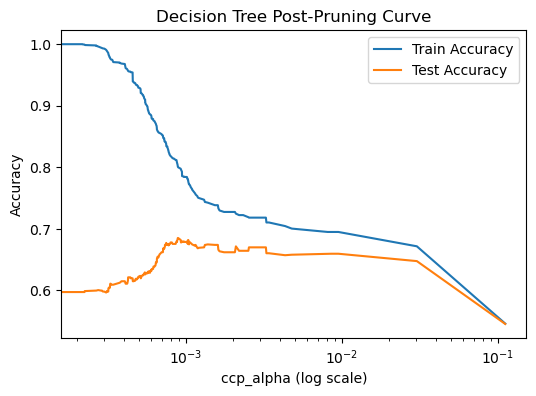

In [161]:
plt.figure(figsize=(6,4))
plt.plot(pruned_df["alpha"], pruned_df["train_acc"], label="Train Accuracy")
plt.plot(pruned_df["alpha"], pruned_df["test_acc"], label="Test Accuracy")
plt.xscale("log")
plt.xlabel("ccp_alpha (log scale)")
plt.ylabel("Accuracy")
plt.title("Decision Tree Post-Pruning Curve")
plt.legend()
plt.show()


In [162]:
best_pruned_row = pruned_df.loc[pruned_df["test_acc"].idxmax()]
best_pruned_row


alpha        0.000887
train_acc    0.801232
test_acc     0.685008
Name: 289, dtype: float64

In [163]:
best_alpha = float(best_pruned_row["alpha"])

best_pruned_tree = DecisionTreeClassifier(
    random_state=rs,
    ccp_alpha=best_alpha
)
# Train the pruned tree
best_pruned_tree.fit(X_train, y_train)

from sklearn.tree import export_text
rules = export_text(best_pruned_tree, feature_names=numeric_cols)
print(rules)


|--- Shell_weight <= 0.17
|   |--- Shell_weight <= 0.03
|   |   |--- Shell_weight <= 0.02
|   |   |   |--- class: 1
|   |   |--- Shell_weight >  0.02
|   |   |   |--- Shell_weight <= 0.03
|   |   |   |   |--- class: 2
|   |   |   |--- Shell_weight >  0.03
|   |   |   |   |--- class: 1
|   |--- Shell_weight >  0.03
|   |   |--- Height <= 0.10
|   |   |   |--- Diameter <= 0.24
|   |   |   |   |--- Viscera_weight <= 0.04
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Viscera_weight >  0.04
|   |   |   |   |   |--- class: 1
|   |   |   |--- Diameter >  0.24
|   |   |   |   |--- Shell_weight <= 0.06
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Shell_weight >  0.06
|   |   |   |   |   |--- Shucked_weight <= 0.08
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Shucked_weight >  0.08
|   |   |   |   |   |   |--- class: 2
|   |   |--- Height >  0.10
|   |   |   |--- Shucked_weight <= 0.19
|   |   |   |   |--- Whole_weight <= 0.45
|   |   |   |   |   |--- Shucked

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Different numbers of trees (estimators) to test
n_list = [10, 50, 100, 200, 300, 500]
rf_results = []

for n in n_list:
    rf = RandomForestClassifier(
        n_estimators=n,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train, y_train) # Train the Random Forest

    train_acc = accuracy_score(y_train, rf.predict(X_train))
    test_acc  = accuracy_score(y_test,  rf.predict(X_test))

    rf_results.append({
        "n_estimators": n,
        "train_acc": train_acc,
        "test_acc": test_acc
    })

rf_df = pd.DataFrame(rf_results)
rf_df

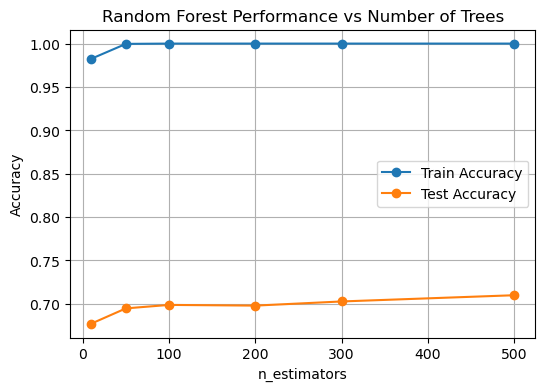

In [135]:
plt.figure(figsize=(6,4))
plt.plot(rf_df["n_estimators"], rf_df["train_acc"], marker='o', label="Train Accuracy")
plt.plot(rf_df["n_estimators"], rf_df["test_acc"], marker='o', label="Test Accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Random Forest Performance vs Number of Trees")
plt.legend()
plt.grid(True)
plt.show()


In [136]:
best_rf_row = rf_df.loc[rf_df["test_acc"].idxmax()]
best_rf_row


n_estimators    500.000000
train_acc         1.000000
test_acc          0.709729
Name: 5, dtype: float64

In [137]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create a Gradient Boosting classifier with a fixed random state
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
# Compute training and test accuracy
gb_train_acc = accuracy_score(y_train, gb.predict(X_train))
gb_test_acc  = accuracy_score(y_test,  gb.predict(X_test))

print("Gradient Boosting Train Accuracy:", gb_train_acc)
print("Gradient Boosting Test Accuracy :", gb_test_acc)


Gradient Boosting Train Accuracy: 0.8234690386589121
Gradient Boosting Test Accuracy : 0.70414673046252


In [138]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convert AgeClass from [1,2,3,4] --> [0,1,2,3]
y_zero = df["AgeClass"].values - 1

#XGBoost use a 0-based tag
X_train, X_test, y_train, y_test = train_test_split(
    X, y_zero, test_size=0.3, random_state=42, stratify=y_zero
)

np.unique(y_train)


array([0, 1, 2, 3])

In [139]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softmax",
    num_class=4,       # tags are 0,1,2,3
    eval_metric="mlogloss",
    random_state=42
)

xgb.fit(X_train, y_train)

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc  = accuracy_score(y_test,  xgb.predict(X_test))

print("XGBoost Train Accuracy:", xgb_train_acc)
print("XGBoost Test Accuracy :", xgb_test_acc)


XGBoost Train Accuracy: 0.9657885733835101
XGBoost Test Accuracy : 0.6985645933014354


In [140]:
from sklearn.decomposition import PCA

#Standardization has been done, but here we need to redo scaler
from sklearn.preprocessing import StandardScaler

scaler_all = StandardScaler()
X_scaled_all = scaler_all.fit_transform(X)

# PCA 95%
pca95 = PCA(n_components=0.95)
X_pca95 = pca95.fit_transform(X_scaled_all)
print("PCA 95% n_components:", X_pca95.shape[1])

# PCA 98%
pca98 = PCA(n_components=0.98)
X_pca98 = pca98.fit_transform(X_scaled_all)
print("PCA 98% n_components:", X_pca98.shape[1])


PCA 95% n_components: 3
PCA 98% n_components: 4


In [141]:
# split
X_train95, X_test95, y_train95, y_test95 = train_test_split(
    X_pca95, y_zero, test_size=0.3, random_state=42, stratify=y_zero
)

xgb95 = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softmax",
    num_class=4,
    eval_metric="mlogloss",
    random_state=42
)
# Train the XGBoost model
xgb95.fit(X_train95, y_train95)

print("PCA95 Train Accuracy:", accuracy_score(y_train95, xgb95.predict(X_train95)))
print("PCA95 Test Accuracy :", accuracy_score(y_test95,  xgb95.predict(X_test95)))


PCA95 Train Accuracy: 0.8994184057475196
PCA95 Test Accuracy : 0.6499202551834131


In [142]:
# split
X_train98, X_test98, y_train98, y_test98 = train_test_split(
    X_pca98, y_zero, test_size=0.3, random_state=42, stratify=y_zero
)
# Create an XGBoost classifier
xgb98 = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softmax",
    num_class=4,
    eval_metric="mlogloss",
    random_state=42
)

xgb98.fit(X_train98, y_train98)

print("PCA98 Train Accuracy:", accuracy_score(y_train98, xgb98.predict(X_train98)))
print("PCA98 Test Accuracy :", accuracy_score(y_test98,  xgb98.predict(X_test98)))


PCA98 Train Accuracy: 0.9603147451248717
PCA98 Test Accuracy : 0.6754385964912281


In [143]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Turn to Tensor（float32）
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.long)

X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.long)

# Dataloader
train_ds = TensorDataset(X_train_t, y_train_t)
test_ds = TensorDataset(X_test_t, y_test_t)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=64)


In [144]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=32, dropout_rate=0.0):
        super().__init__()
         # Define a simple 3-layer MLP for 4-class classification
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim), # input → hidden
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_dim, hidden_dim), # hidden → hidden
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_dim, 4)   # 4-class output
        )
        
    def forward(self, x):
        return self.net(x)


In [145]:
def train_model(model, train_loader, optimizer, epochs=30):
    criterion = nn.CrossEntropyLoss()
    model.train()

    for epoch in range(epochs):
        for xb, yb in train_loader:
            optimizer.zero_grad()
            pred = model(xb)
            loss = criterion(pred, yb)
            loss.backward()
            optimizer.step()

def evaluate(model, loader):
    model.eval() # set model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad(): # no gradient computation
        for xb, yb in loader:
            pred = model(xb)   # forward pass
            _, predicted = torch.max(pred, 1)
            correct += (predicted == yb).sum().item()
            total += yb.size(0)
    return correct / total


In [146]:
input_dim = X_train.shape[1]

# SGD
model_sgd = MLP(input_dim, dropout_rate=0.0)
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)

train_model(model_sgd, train_loader, optimizer_sgd, epochs=30)
sgd_train_acc = evaluate(model_sgd, train_loader)
sgd_test_acc  = evaluate(model_sgd, test_loader)

print("SGD Train Acc:", sgd_train_acc)
print("SGD Test Acc :", sgd_test_acc)

# Adam
model_adam = MLP(input_dim, dropout_rate=0.0)
optimizer_adam = optim.Adam(model_adam.parameters(), lr=0.01)

train_model(model_adam, train_loader, optimizer_adam, epochs=30)
adam_train_acc = evaluate(model_adam, train_loader)
adam_test_acc  = evaluate(model_adam, test_loader)

print("Adam Train Acc:", adam_train_acc)
print("Adam Test Acc :", adam_test_acc)


SGD Train Acc: 0.651043448511803
SGD Test Acc : 0.6379585326953748
Adam Train Acc: 0.7191241874786178
Adam Test Acc : 0.6993620414673046


In [147]:
dropouts = [0.0, 0.3, 0.5]
dop_results = []
# Loop over each dropout value
for dr in dropouts:
    model = MLP(input_dim, dropout_rate=dr)
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    # Train the model
    train_model(model, train_loader, optimizer, epochs=30)
    
    train_acc = evaluate(model, train_loader)
    test_acc  = evaluate(model, test_loader)
    
    dop_results.append((dr, train_acc, test_acc))

dop_results


In [96]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Turn to tensor
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.long)

X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.long)

# Use dataloader
train_ds = TensorDataset(X_train_t, y_train_t)
test_ds  = TensorDataset(X_test_t, y_test_t)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=64, shuffle=False)


In [97]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=32, dropout_rate=0.0):
        super().__init__()
        # A simple 3-layer MLP for 4-class classification
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate),

            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate),

            nn.Linear(hidden_dim, 4)   # 4 classes
        )

    def forward(self, x):
        return self.net(x)


In [98]:
def train_model(model, loader, optimizer, epochs=30):
    model.train()
    criterion = nn.CrossEntropyLoss()   # loss for multi-class classification

    for epoch in range(epochs):
        for xb, yb in loader:
            optimizer.zero_grad()
            pred = model(xb)
            loss = criterion(pred, yb)
            loss.backward()
            optimizer.step()

def evaluate(model, loader):
    model.eval()  # evaluation mode (no dropout)
    correct = 0
    total = 0
    with torch.no_grad():
        for xb, yb in loader:
            pred = model(xb)
            _, predicted = torch.max(pred, 1)
            correct += (predicted == yb).sum().item()
            total += yb.size(0)
    return correct / total


In [99]:
input_dim = X_train.shape[1]  # 7 features

# SGD
model_sgd = MLP(input_dim, dropout_rate=0.0)
opt_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)

train_model(model_sgd, train_loader, opt_sgd)
sgd_train = evaluate(model_sgd, train_loader)
sgd_test  = evaluate(model_sgd, test_loader)

print("SGD Train Acc:", sgd_train)
print("SGD Test Acc :", sgd_test)

# Adam
model_adam = MLP(input_dim, dropout_rate=0.0)
opt_adam = optim.Adam(model_adam.parameters(), lr=0.01)

train_model(model_adam, train_loader, opt_adam)
adam_train = evaluate(model_adam, train_loader)
adam_test  = evaluate(model_adam, test_loader)

print("Adam Train Acc:", adam_train)
print("Adam Test Acc :", adam_test)


SGD Train Acc: 0.651043448511803
SGD Test Acc : 0.6411483253588517
Adam Train Acc: 0.7201505302771125
Adam Test Acc : 0.70414673046252


In [100]:
dropouts = [0.0, 0.3, 0.5]
results = []
# Loop through each dropout value
for dr in dropouts:
    model = MLP(input_dim, dropout_rate=dr)
    opt = optim.Adam(model.parameters(), lr=0.01)

    train_model(model, train_loader, opt)   # train the model
    train_acc = evaluate(model, train_loader)
    test_acc  = evaluate(model, test_loader)

    results.append((dr, train_acc, test_acc))

results


[(0.0, 0.722203215874102, 0.715311004784689),
 (0.3, 0.7023605884365378, 0.6802232854864434),
 (0.5, 0.7115976736229901, 0.696969696969697)]

In [101]:
#partB

In [148]:
import pandas as pd

url = "cmc.data"

col_names = [
    "WifeAge", "WifeEducation", "HusbandEducation",
    "NumChildren", "WifeReligion", "WifeWorking",
    "HusbandOccupation", "LivingIndex", "MediaExposure",
    "ContraceptiveMethod"
]

df_cmc = pd.read_csv(url, names=col_names)

print(df_cmc.head())
print(df_cmc.info())


   WifeAge  WifeEducation  HusbandEducation  NumChildren  WifeReligion  \
0       24              2                 3            3             1   
1       45              1                 3           10             1   
2       43              2                 3            7             1   
3       42              3                 2            9             1   
4       36              3                 3            8             1   

   WifeWorking  HusbandOccupation  LivingIndex  MediaExposure  \
0            1                  2            3              0   
1            1                  3            4              0   
2            1                  3            4              0   
3            1                  3            3              0   
4            1                  3            2              0   

   ContraceptiveMethod  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
<class 'pandas

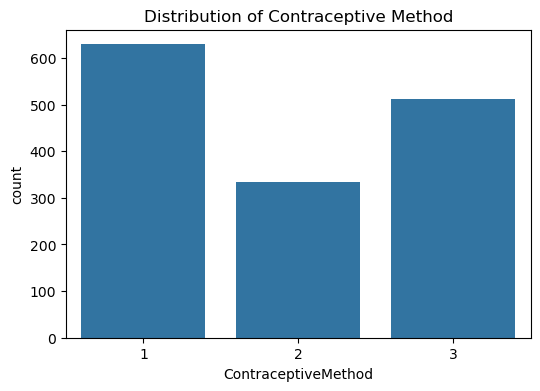

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="ContraceptiveMethod", data=df_cmc)
plt.title("Distribution of Contraceptive Method")
plt.show()


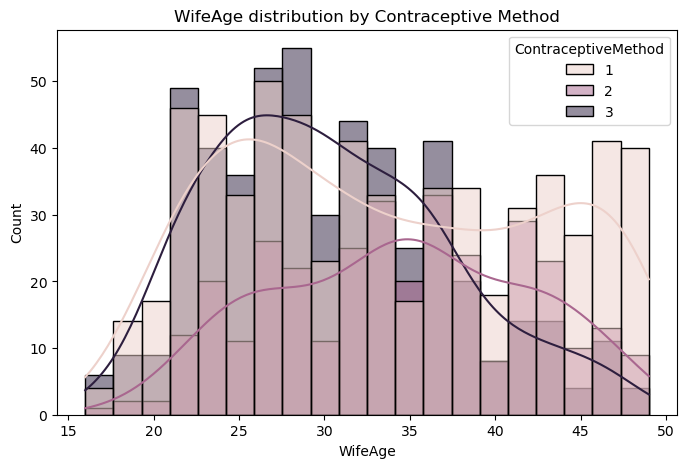

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(data=df_cmc, x="WifeAge", hue="ContraceptiveMethod", kde=True, bins=20)
plt.title("WifeAge distribution by Contraceptive Method")
plt.show()


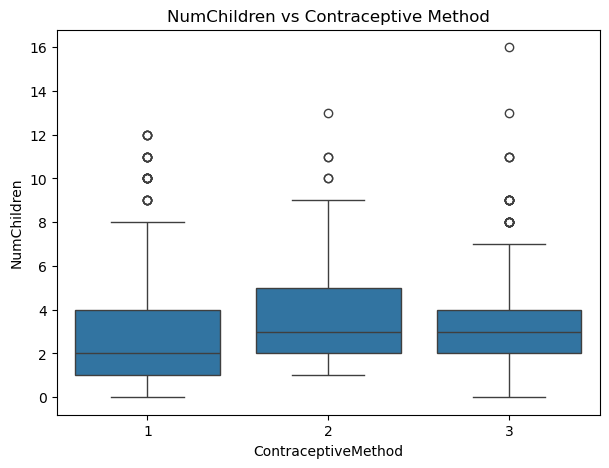

In [44]:
plt.figure(figsize=(7,5))
sns.boxplot(x="ContraceptiveMethod", y="NumChildren", data=df_cmc)
plt.title("NumChildren vs Contraceptive Method")
plt.show()


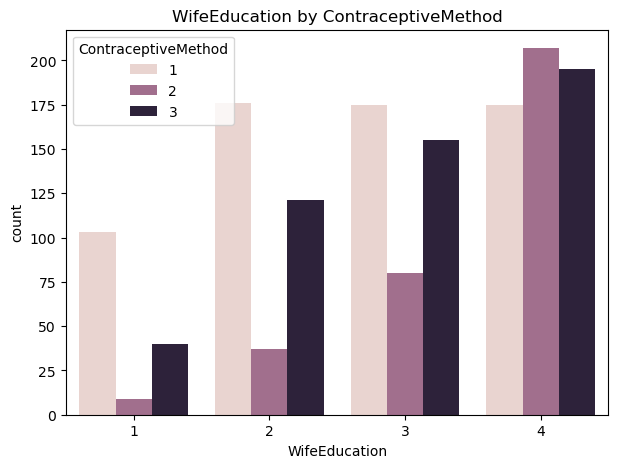

In [45]:
plt.figure(figsize=(7,5))
sns.countplot(x="WifeEducation", hue="ContraceptiveMethod", data=df_cmc)
plt.title("WifeEducation by ContraceptiveMethod")
plt.show()


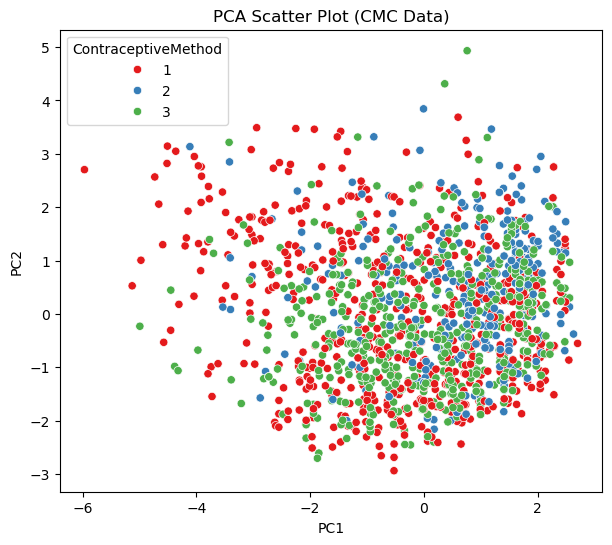

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Separate features and labels
features = df_cmc.drop("ContraceptiveMethod", axis=1)
labels = df_cmc["ContraceptiveMethod"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
# Apply PCA to reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="Set1")
plt.title("PCA Scatter Plot (CMC Data)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Features & Tags
X_cmc = df_cmc.drop("ContraceptiveMethod", axis=1)
y_cmc = df_cmc["ContraceptiveMethod"] - 1

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
X_cmc_encoded = encoder.fit_transform(X_cmc)

X_cmc_encoded.shape, y_cmc.shape


((1473, 71), (1473,))

In [48]:
X_train_cmc, X_test_cmc, y_train_cmc, y_test_cmc = train_test_split(
    X_cmc_encoded, y_cmc, test_size=0.3, random_state=42, stratify=y_cmc
)

X_train_cmc.shape, X_test_cmc.shape


((1031, 71), (442, 71))

In [49]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
# Define an XGBoost classifier for 3-class classification
xgb_cmc = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softmax",
    num_class=3,
    eval_metric="mlogloss",
    random_state=42
)
# Train the model
xgb_cmc.fit(X_train_cmc, y_train_cmc)

y_pred_xgb = xgb_cmc.predict(X_test_cmc)

print("XGB Accuracy:", accuracy_score(y_test_cmc, y_pred_xgb))
print("XGB F1 Macro:", f1_score(y_test_cmc, y_pred_xgb, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test_cmc, y_pred_xgb))


XGB Accuracy: 0.5452488687782805
XGB F1 Macro: 0.5118842977187997
Confusion Matrix:
 [[128  21  40]
 [ 28  34  38]
 [ 45  29  79]]


In [50]:
import torch
from torch.utils.data import TensorDataset, DataLoader
# Convert NumPy arrays into PyTorch tensors
X_train_t = torch.tensor(X_train_cmc, dtype=torch.float32)
y_train_t = torch.tensor(y_train_cmc.values, dtype=torch.long)

X_test_t = torch.tensor(X_test_cmc, dtype=torch.float32)
y_test_t = torch.tensor(y_test_cmc.values, dtype=torch.long)
# Build dataset objects
train_ds = TensorDataset(X_train_t, y_train_t)
test_ds  = TensorDataset(X_test_t, y_test_t)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=64)


In [51]:
import torch.nn as nn
import torch.optim as optim

class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=64):
        super().__init__()
        # A simple 2-layer MLP for 3-class classification
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 3)      # 3 classes
        )
        
    def forward(self, x):
        return self.net(x)


In [52]:
def train_model(model, loader, optimizer, epochs=30):
    model.train() # enable training mode
    criterion = nn.CrossEntropyLoss()
    for epoch in range(epochs):
        for xb, yb in loader:  # iterate batches
            optimizer.zero_grad()
            pred = model(xb)  # forward pass
            loss = criterion(pred, yb)
            loss.backward()
            optimizer.step()

def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():   # no gradient needed
        for xb, yb in loader:
            pred = model(xb)
            _, predicted = torch.max(pred, 1)
            correct += (predicted == yb).sum().item()
            total += yb.size(0)
    return correct / total


In [53]:
input_dim = X_train_cmc.shape[1]
# Create MLP model and Adam optimizer
model_mlp = MLP(input_dim)
optimizer = optim.Adam(model_mlp.parameters(), lr=0.01)
# Train the MLP
train_model(model_mlp, train_loader, optimizer, epochs=30)

# prediction
model_mlp.eval()
y_pred_mlp = model_mlp(X_test_t)
_, pred_labels = torch.max(y_pred_mlp, 1)

pred_np = pred_labels.cpu().tolist()

print("MLP Accuracy:", accuracy_score(y_test_cmc, pred_np))
print("MLP F1 Macro:", f1_score(y_test_cmc, pred_np, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test_cmc, pred_np))


MLP Accuracy: 0.4751131221719457
MLP F1 Macro: 0.45277618445157714
Confusion Matrix:
 [[113  33  43]
 [ 29  39  32]
 [ 51  44  58]]
